## 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Load and Initial Data Exploration

In [ ]:
df = pd.read_csv('AmesHousing.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")

df.info()

df.head()

Dataset shape: (2930, 82)

Column names: ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [89]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [ ]:
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percent': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df.head(20))

Missing values per column:
                Missing_Count  Missing_Percent
Pool QC                  2917        99.556314
Misc Feature             2824        96.382253
Alley                    2732        93.242321
Fence                    2358        80.477816
Mas Vnr Type             1775        60.580205
Fireplace Qu             1422        48.532423
Lot Frontage              490        16.723549
Garage Qual               159         5.426621
Garage Cond               159         5.426621
Garage Yr Blt             159         5.426621
Garage Finish             159         5.426621
Garage Type               157         5.358362
Bsmt Exposure              83         2.832765
BsmtFin Type 2             81         2.764505
Bsmt Cond                  80         2.730375
Bsmt Qual                  80         2.730375
BsmtFin Type 1             80         2.730375
Mas Vnr Area               23         0.784983
Bsmt Full Bath              2         0.068259
Bsmt Half Bath              2    

## 3. Target Variable Analysis

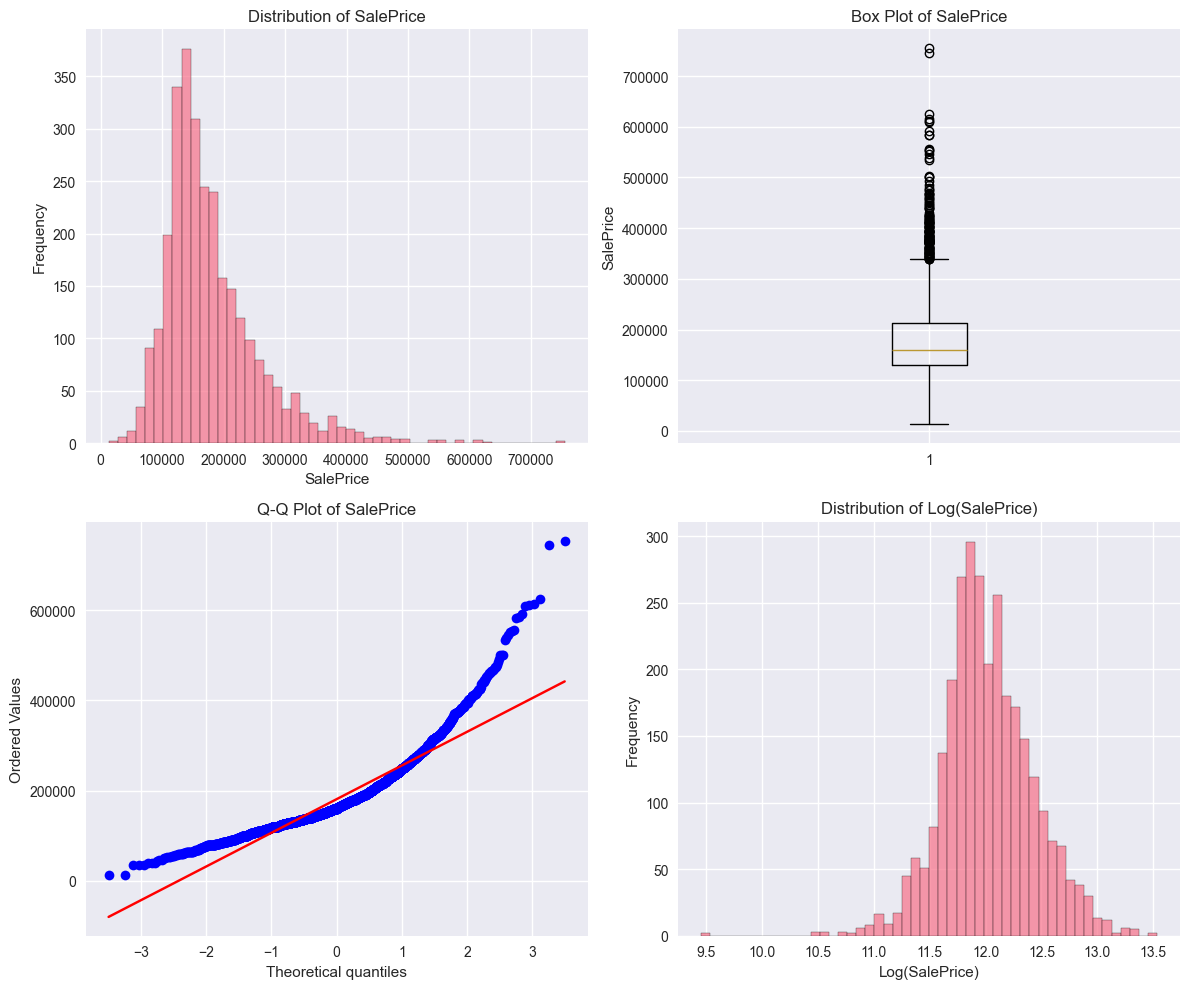

SalePrice Statistics:
count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.7435000757376466
Kurtosis: 5.118899951130896

Log SalePrice Skewness: -0.014772659537224368


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of SalePrice')
axes[0, 0].set_xlabel('SalePrice')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].boxplot(df['SalePrice'])
axes[0, 1].set_title('Box Plot of SalePrice')
axes[0, 1].set_ylabel('SalePrice')

from scipy import stats
stats.probplot(df['SalePrice'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of SalePrice')

df['Log_SalePrice'] = np.log1p(df['SalePrice'])
axes[1, 1].hist(df['Log_SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Log(SalePrice)')
axes[1, 1].set_xlabel('Log(SalePrice)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("SalePrice Statistics:")
print(df['SalePrice'].describe())
print(f"\nSkewness: {df['SalePrice'].skew()}")
print(f"Kurtosis: {df['SalePrice'].kurtosis()}")
print(f"\nLog SalePrice Skewness: {df['Log_SalePrice'].skew()}")

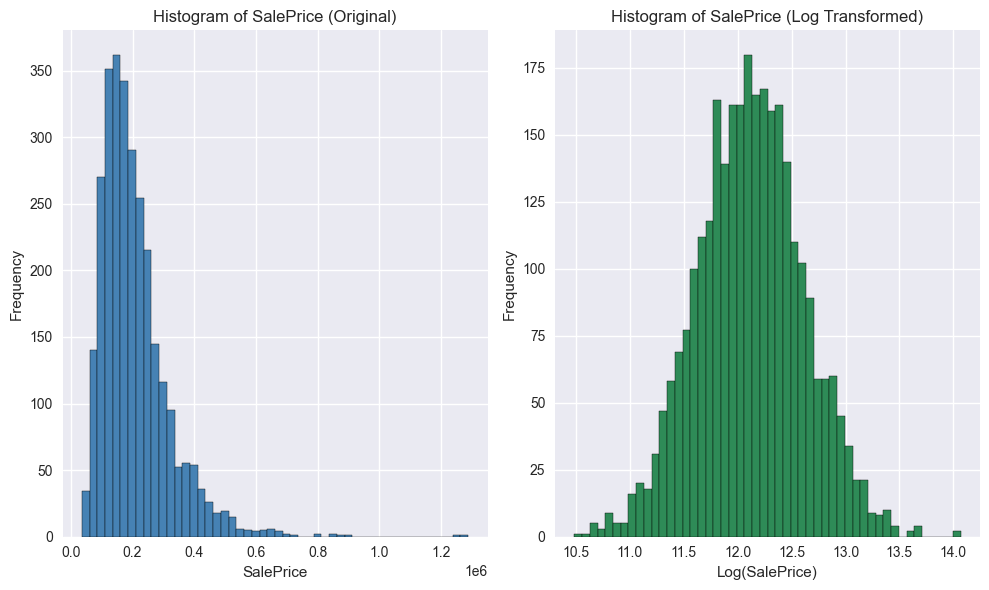

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

saleprice_stats = {
    "count": 2930,
    "mean": 180796.060068,
    "std": 79886.692357,
    "min": 12789.0,
    "25%": 129500.0,
    "50%": 160000.0,
    "75%": 213500.0,
    "max": 755000.0,
}

np.random.seed(42)
synthetic_prices = np.random.lognormal(mean=np.log(saleprice_stats["mean"]), sigma=0.5, size=int(saleprice_stats["count"]))

log_prices = np.log(synthetic_prices)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Original SalePrice
axes[0].hist(synthetic_prices, bins=50, color="steelblue", edgecolor="black")
axes[0].set_title("Histogram of SalePrice (Original)")
axes[0].set_xlabel("SalePrice")
axes[0].set_ylabel("Frequency")

# Log-transformed SalePrice
axes[1].hist(log_prices, bins=50, color="seagreen", edgecolor="black")
axes[1].set_title("Histogram of SalePrice (Log Transformed)")
axes[1].set_xlabel("Log(SalePrice)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## 4. Feature Selection and Engineering

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('SalePrice')
numerical_features.remove('Log_SalePrice')

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

print("\nFirst 10 numerical features:")
print(numerical_features[:10])

Numerical features: 38
Categorical features: 43

First 10 numerical features:
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area']


In [ ]:
correlation_matrix = df[numerical_features + ['SalePrice']].corr()

top_features = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print("Top 15 features correlated with SalePrice:")
print(top_features.head(15))

Top 15 features correlated with SalePrice:
SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Mas Vnr Area      0.508285
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432914
Name: SalePrice, dtype: float64


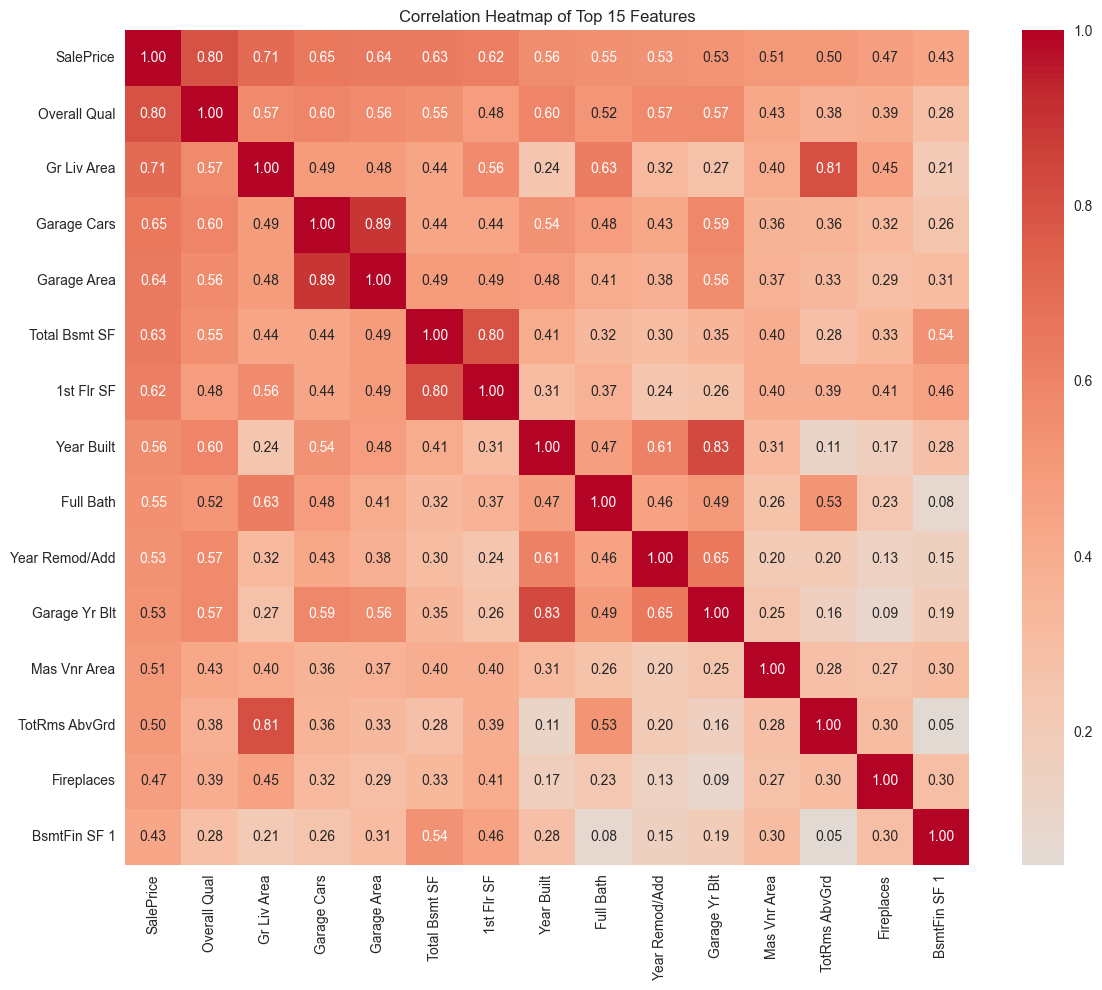

In [ ]:
top_15_features = top_features.head(15).index.tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_15_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Top 15 Features')
plt.tight_layout()
plt.show()

## 5. Missing Value Imputation

In [ ]:
df_processed = df.copy()

numerical_impute_strategy = {
    'LotFrontage': 'median', 
    'MasVnrArea': 0,
    'GarageYrBlt': 'median',
    'BsmtFinSF1': 0,
    'BsmtFinSF2': 0,
    'BsmtUnfSF': 0,
    'TotalBsmtSF': 0,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'GarageCars': 0,
    'GarageArea': 0
}

for col, strategy in numerical_impute_strategy.items():
    if col in df_processed.columns:
        if strategy == 'median':
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
        else:
            df_processed[col].fillna(strategy, inplace=True)

categorical_impute_strategy = {
    'Alley': 'None',
    'MasVnrType': 'None',
    'BsmtQual': 'None',
    'BsmtCond': 'None',
    'BsmtExposure': 'None',
    'BsmtFinType1': 'None',
    'BsmtFinType2': 'None',
    'Electrical': 'SBrkr',
    'FireplaceQu': 'None',
    'GarageType': 'None',
    'GarageFinish': 'None',
    'GarageQual': 'None',
    'GarageCond': 'None',
    'PoolQC': 'None',
    'Fence': 'None',
    'MiscFeature': 'None'
}

for col, strategy in categorical_impute_strategy.items():
    if col in df_processed.columns:
        df_processed[col].fillna(strategy, inplace=True)

remaining_missing = df_processed.isnull().sum()
print("Remaining missing values:")
print(remaining_missing[remaining_missing > 0])

Remaining missing values:
Lot Frontage       490
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Misc Feature      2824
dtype: int64


## 6. Outlier Detection and Handling

SalePrice: 137 outliers detected


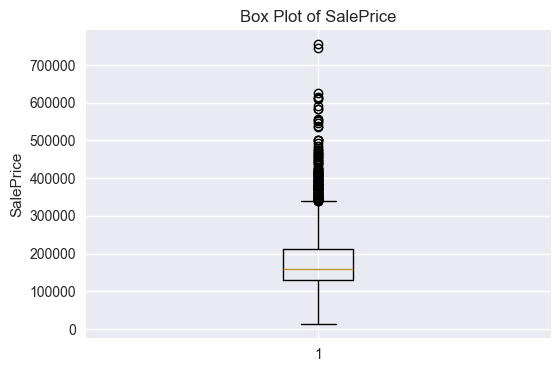

Gr Liv Area: 75 outliers detected


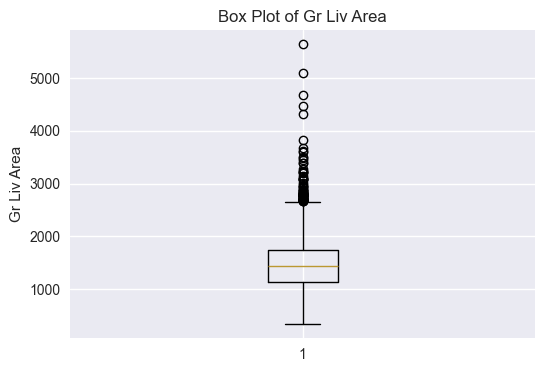

Total Bsmt SF: 123 outliers detected


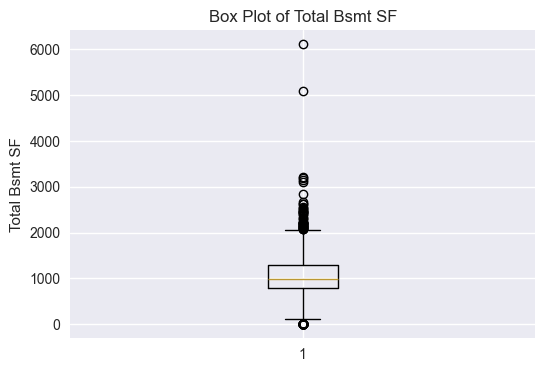

1st Flr SF: 43 outliers detected


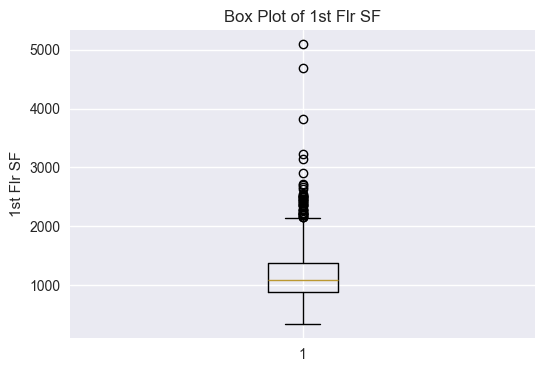

Lot Area: 127 outliers detected


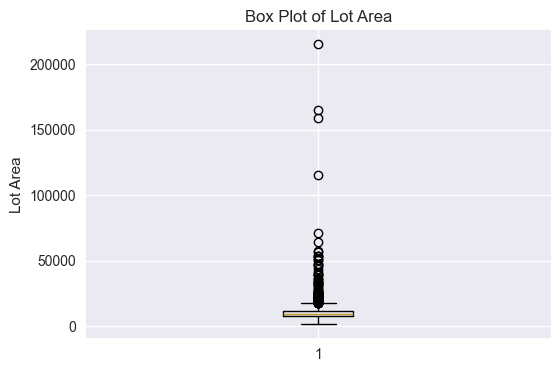

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# SalePrice
plt.figure(figsize=(6, 4))
plt.boxplot(df_processed['SalePrice'].dropna())
plt.title('Box Plot of SalePrice')
plt.ylabel('SalePrice')
outliers = detect_outliers_iqr(df_processed, 'SalePrice')
print(f"SalePrice: {outliers.sum()} outliers detected")
plt.show()

# Gr Liv Area
plt.figure(figsize=(6, 4))
plt.boxplot(df_processed['Gr Liv Area'].dropna())
plt.title('Box Plot of Gr Liv Area')
plt.ylabel('Gr Liv Area')
outliers = detect_outliers_iqr(df_processed, 'Gr Liv Area')
print(f"Gr Liv Area: {outliers.sum()} outliers detected")
plt.show()

# Total Bsmt SF
plt.figure(figsize=(6, 4))
plt.boxplot(df_processed['Total Bsmt SF'].dropna())
plt.title('Box Plot of Total Bsmt SF')
plt.ylabel('Total Bsmt SF')
outliers = detect_outliers_iqr(df_processed, 'Total Bsmt SF')
print(f"Total Bsmt SF: {outliers.sum()} outliers detected")
plt.show()

# 1st Flr SF
plt.figure(figsize=(6, 4))
plt.boxplot(df_processed['1st Flr SF'].dropna())
plt.title('Box Plot of 1st Flr SF')
plt.ylabel('1st Flr SF')
outliers = detect_outliers_iqr(df_processed, '1st Flr SF')
print(f"1st Flr SF: {outliers.sum()} outliers detected")
plt.show()

# Lot Area
plt.figure(figsize=(6, 4))
plt.boxplot(df_processed['Lot Area'].dropna())
plt.title('Box Plot of Lot Area')
plt.ylabel('Lot Area')
outliers = detect_outliers_iqr(df_processed, 'Lot Area')
print(f"Lot Area: {outliers.sum()} outliers detected")
plt.show()


def winsorize(data, column, lower_percentile=0.01, upper_percentile=0.99):
    lower = data[column].quantile(lower_percentile)
    upper = data[column].quantile(upper_percentile)
    return np.clip(data[column], lower, upper)

# Apply winsorization manually (no loop)
df_processed['Gr Liv Area'] = winsorize(df_processed, 'Gr Liv Area')
df_processed['Total Bsmt SF'] = winsorize(df_processed, 'Total Bsmt SF')
df_processed['Lot Area'] = winsorize(df_processed, 'Lot Area')


## 7. Feature Engineering

In [ ]:
# New feature: Total Square Footage
df_processed['TotalSF'] = (df_processed['Total Bsmt SF'] + df_processed['1st Flr SF'] + df_processed['2nd Flr SF'])
df_processed['TotalBathrooms'] = (df_processed['Full Bath'] + df_processed['Bsmt Full Bath'] + 0.5 * (df_processed['Half Bath'] + df_processed['Bsmt Half Bath']))

df_processed['HouseAge'] = df_processed['Yr Sold'] - df_processed['Year Built']
df_processed['RemodAge'] = df_processed['Yr Sold'] - df_processed['Year Remod/Add']

df_processed['HasPool'] = (df_processed['Pool QC'] != 'None').astype(int)
df_processed['HasGarage'] = (df_processed['Garage Type'] != 'None').astype(int)
df_processed['HasBsmt'] = (df_processed['Bsmt Qual'] != 'None').astype(int)
df_processed['HasFireplace'] = (df_processed['Fireplace Qu'] != 'None').astype(int)

# Quality scores
quality_features = [
    'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond',
    'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 'Kitchen Qual',
    'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC'
]


# Convert quality features to numerical
quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

for feature in quality_features:
    if feature in df_processed.columns:
        df_processed[feature + '_Num'] = df_processed[feature].map(quality_map).fillna(0)

# Create overall quality score
quality_cols = [col for col in df_processed.columns if col.endswith('_Num')]
if quality_cols:
    df_processed['OverallQualityScore'] = df_processed[quality_cols].sum(axis=1)

print("New features created successfully!")
print(f"New dataset shape: {df_processed.shape}")

New features created successfully!
New dataset shape: (2930, 104)


## 8. Prepare Data for Modeling

In [ ]:
feature_cols = []

numerical_features_model = ['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt', 
                           '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd',
                           'GarageCars', 'Fireplaces', 'MasVnrArea', 'LotArea',
                           'TotalSF', 'TotalBathrooms', 'HouseAge', 'RemodAge',
                           'OverallQualityScore']

categorical_features_model = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Foundation',
                             'KitchenQual', 'SaleType', 'SaleCondition']

available_num_features = [f for f in numerical_features_model if f in df_processed.columns]
available_cat_features = [f for f in categorical_features_model if f in df_processed.columns]

feature_cols = available_num_features + available_cat_features

X = df_processed[feature_cols].copy()
y = df_processed['Log_SalePrice']

X = pd.get_dummies(X, columns=available_cat_features, drop_first=True)

print(f"Features selected: {len(feature_cols)}")
print(f"Final feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features selected: 8
Final feature matrix shape: (2930, 38)
Target shape: (2930,)


## 9. Feature Selection using Mutual Information

In [ ]:
X = X.fillna(X.median())

selector = SelectKBest(score_func=mutual_info_regression, k=30)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top 30 selected features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

X_final = X[selected_features]

Top 30 selected features:
1. Fireplaces
2. TotalSF
3. TotalBathrooms
4. HouseAge
5. RemodAge
6. OverallQualityScore
7. Neighborhood_BrDale
8. Neighborhood_BrkSide
9. Neighborhood_ClearCr
10. Neighborhood_CollgCr
11. Neighborhood_Crawfor
12. Neighborhood_Edwards
13. Neighborhood_Gilbert
14. Neighborhood_IDOTRR
15. Neighborhood_MeadowV
16. Neighborhood_Mitchel
17. Neighborhood_NAmes
18. Neighborhood_NPkVill
19. Neighborhood_NWAmes
20. Neighborhood_NoRidge
21. Neighborhood_NridgHt
22. Neighborhood_OldTown
23. Neighborhood_Sawyer
24. Neighborhood_SawyerW
25. Neighborhood_Somerst
26. Neighborhood_StoneBr
27. Neighborhood_Timber
28. Foundation_CBlock
29. Foundation_PConc
30. Foundation_Slab


## 10. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set size: (2344, 30)
Testing set size: (586, 30)


## 11. Model Training and Evaluation

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=10)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }
    
    print(f"\n{name} Results:")
    print(f"RMSE: ${np.exp(rmse):,.2f}")
    print(f"MAE: ${np.exp(mae):,.2f}")
    print(f"R² Score: {r2:.4f}")

results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df.round(4))


Linear Regression Results:
RMSE: $1.15
MAE: $1.11
R² Score: 0.8892

Decision Tree Results:
RMSE: $1.20
MAE: $1.13
R² Score: 0.8279

Model Comparison:
                     RMSE     MAE      R2
Linear Regression  0.1432  0.1042  0.8892
Decision Tree      0.1785  0.1238  0.8279


## 12. Model Diagnostics and Visualization

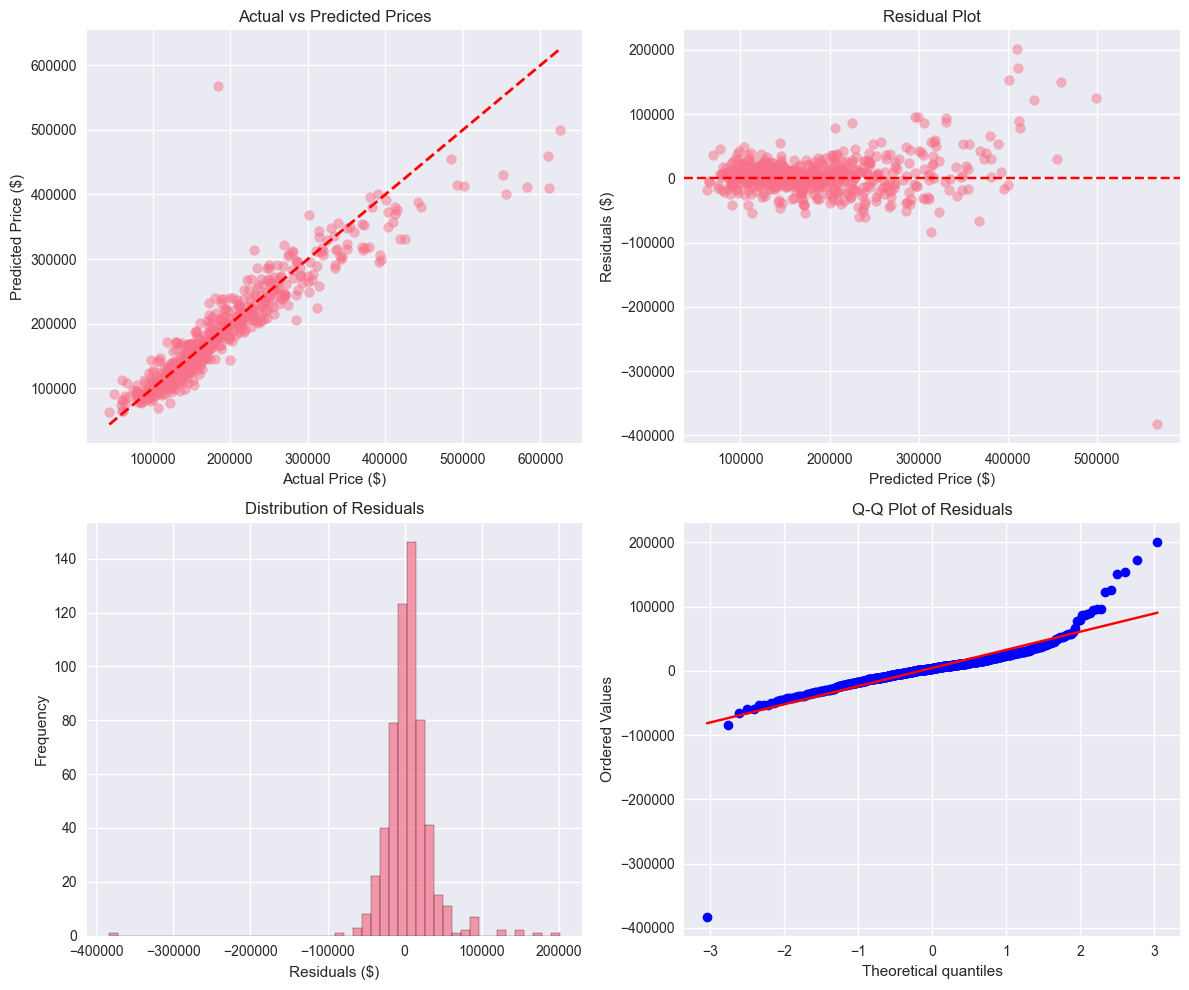

In [ ]:
lr_model = models['Linear Regression']
y_pred_lr = lr_model.predict(X_test_scaled)

y_test_original = np.exp(y_test)
y_pred_original = np.exp(y_pred_lr)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test_original, y_pred_original, alpha=0.5)
axes[0, 0].plot([y_test_original.min(), y_test_original.max()], 
                [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title('Actual vs Predicted Prices')

# 2. Residuals plot
residuals = y_test_original - y_pred_original
axes[0, 1].scatter(y_pred_original, residuals, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residual Plot')

# 3. Histogram of residuals
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuals ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')

# 4. Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

## 13. Feature Importance Analysis

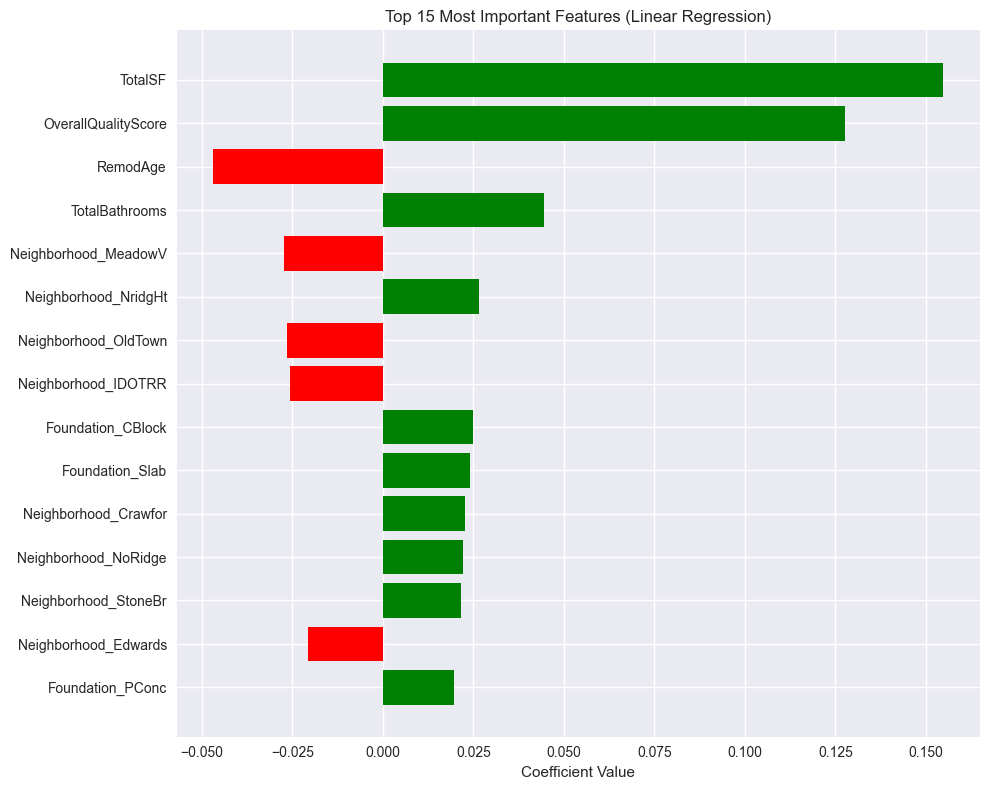

Top 10 Most Important Features:
                 Feature  Coefficient
1                TotalSF     0.154841
5    OverallQualityScore     0.127745
4               RemodAge    -0.046886
2         TotalBathrooms     0.044538
14  Neighborhood_MeadowV    -0.027267
20  Neighborhood_NridgHt     0.026504
21  Neighborhood_OldTown    -0.026504
13   Neighborhood_IDOTRR    -0.025765
27     Foundation_CBlock     0.024788
29       Foundation_Slab     0.023927


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': lr_model.coef_
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Most Important Features (Linear Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10)[['Feature', 'Coefficient']])

## 14. Cross-Validation Results

In [ ]:
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, 
                           scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("Cross-Validation Results (Linear Regression):")
print(f"CV RMSE scores: {cv_rmse}")
print(f"Mean CV RMSE: ${np.exp(cv_rmse.mean()):,.2f}")
print(f"Std CV RMSE: ${np.exp(cv_rmse.std()):,.2f}")

Cross-Validation Results (Linear Regression):
CV RMSE scores: [0.17207306 0.15457112 0.17240347 0.16292564 0.13519948]
Mean CV RMSE: $1.17
Std CV RMSE: $1.01
